# Utilisation de la bibliothèque Matplotlib

In [1]:
# !pip install matplotlib

import matplotlib.pyplot as plt
import numpy as np

# Définition de données de test
x = np.linspace(0, 10, 100)
y = np.sin(x)


## Plot simple

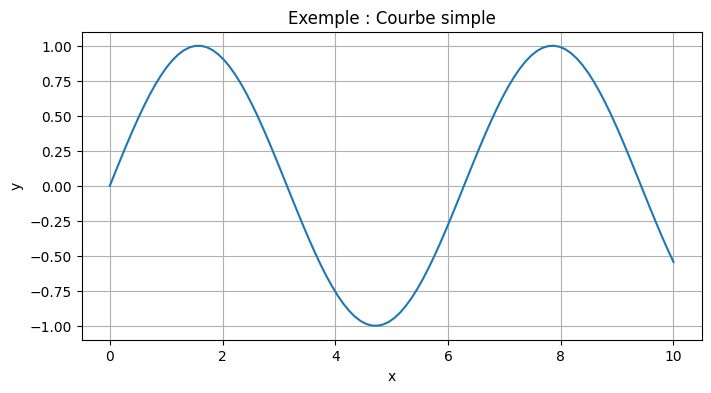

In [2]:
plt.figure(figsize=(8, 4))
plt.plot(x, y)
plt.title("Exemple : Courbe simple")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


## Personnalisation avec couleurs, styles et légendes

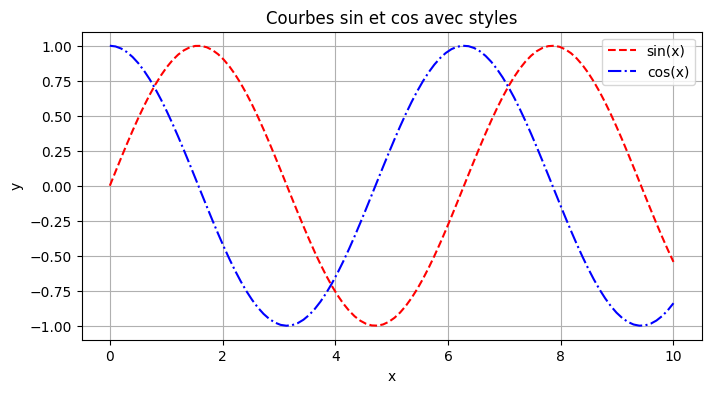

In [3]:
y2 = np.cos(x)

plt.figure(figsize=(8,4))
plt.plot(x, y, 'r--', label='sin(x)')
plt.plot(x, y2, 'b-.', label='cos(x)')
plt.title("Courbes sin et cos avec styles")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


## Graphiques 2D classiques

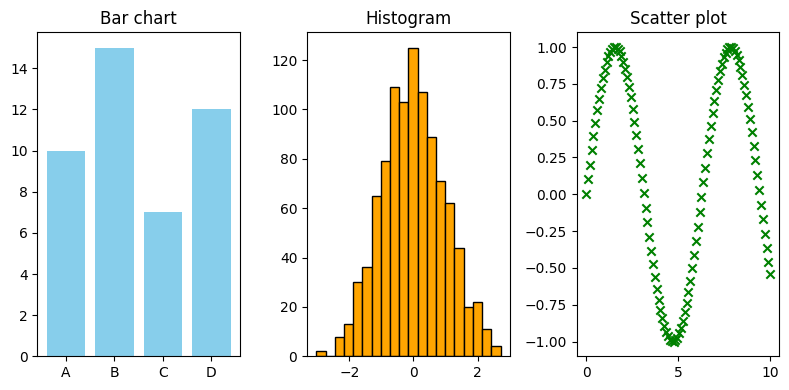

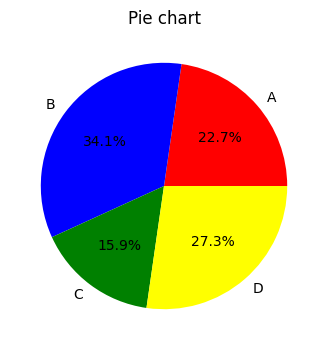

In [4]:
categories = ['A', 'B', 'C', 'D']
values = [10, 15, 7, 12]

plt.figure(figsize=(8,4))

# Bar plot
plt.subplot(1,3,1)
plt.bar(categories, values, color='skyblue')
plt.title("Bar chart")

# Histogramme
plt.subplot(1,3,2)
data = np.random.randn(1000)
plt.hist(data, bins=20, color='orange', edgecolor='black')
plt.title("Histogram")

# Scatter plot
plt.subplot(1,3,3)
plt.scatter(x, y, c='green', marker='x')
plt.title("Scatter plot")

plt.tight_layout()
plt.show()

# Diagramme en camembert
plt.figure(figsize=(4,4))
plt.pie(values, labels=categories, autopct='%1.1f%%', colors=['red','blue','green','yellow'])
plt.title("Pie chart")
plt.show()


## Graphiques avancés 2D (contour, imshow, quiver, streamplot)

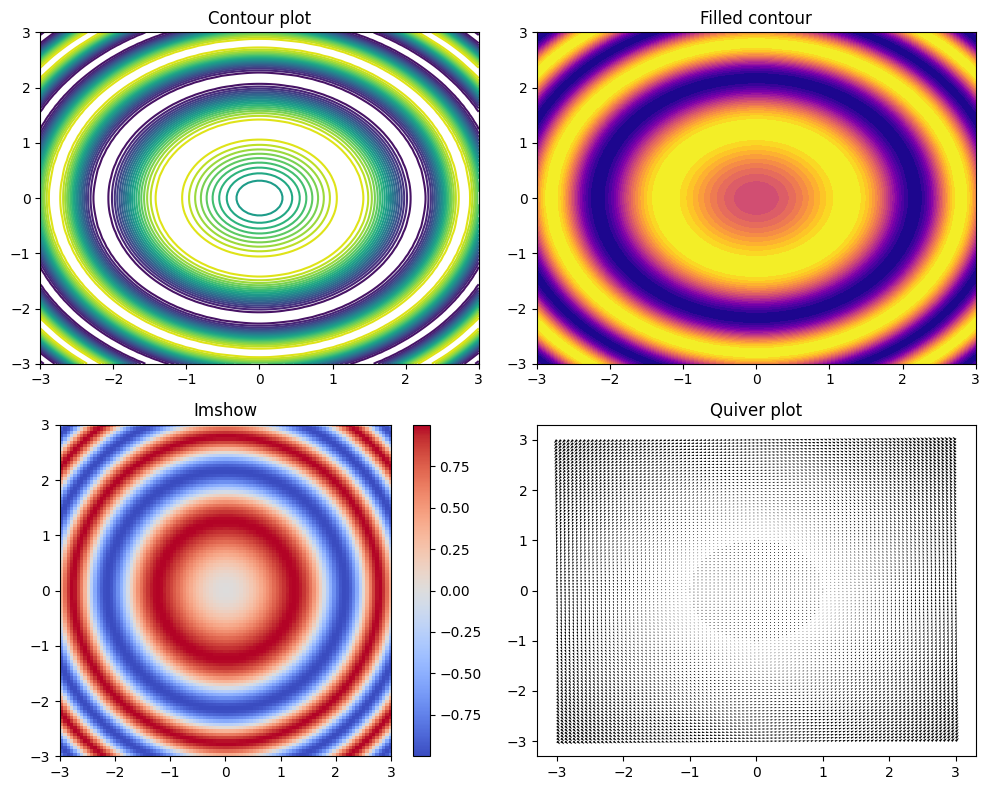

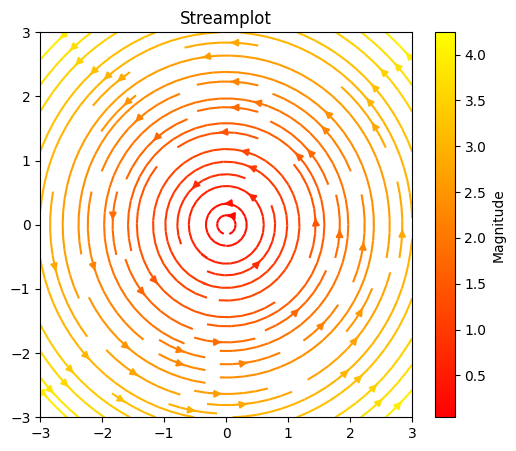

In [5]:
X, Y = np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))
Z = np.sin(X**2 + Y**2)

plt.figure(figsize=(10,8))

# Contour plot
plt.subplot(2,2,1)
plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.title("Contour plot")

# Filled contour
plt.subplot(2,2,2)
plt.contourf(X, Y, Z, levels=20, cmap='plasma')
plt.title("Filled contour")

# Imshow
plt.subplot(2,2,3)
plt.imshow(Z, extent=[-3,3,-3,3], origin='lower', cmap='coolwarm')
plt.colorbar()
plt.title("Imshow")

# Quiver (vecteurs)
U = -Y
V = X
plt.subplot(2,2,4)
plt.quiver(X, Y, U, V)
plt.title("Quiver plot")

plt.tight_layout()
plt.show()

# Streamplot (ligne de flux)
plt.figure(figsize=(6,5))
plt.streamplot(X, Y, U, V, color=np.sqrt(U**2+V**2), cmap='autumn')
plt.colorbar(label='Magnitude')
plt.title("Streamplot")
plt.show()


## Graphiques 3D

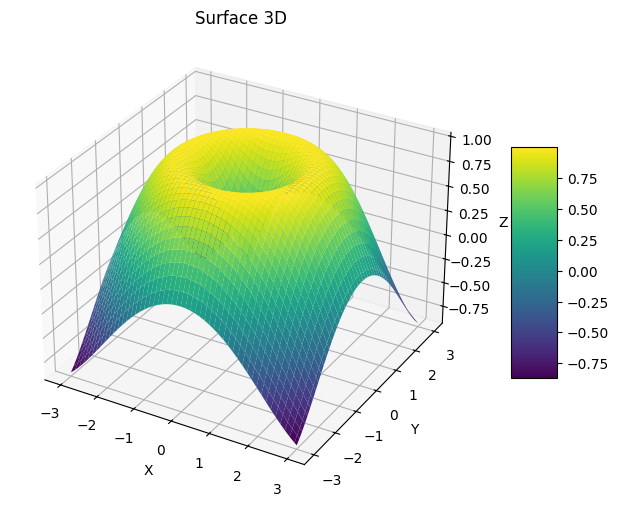

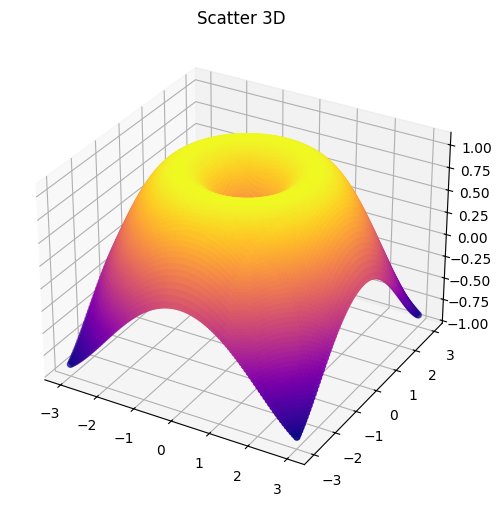

In [6]:
from mpl_toolkits.mplot3d import Axes3D  # Nécessaire pour 3D

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Données
Z = np.sin(np.sqrt(X**2 + Y**2))

# Surface 3D
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Surface 3D")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

# Scatter 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=Z.flatten(), cmap='plasma')
ax.set_title("Scatter 3D")
plt.show()


## Subplots et grids complexes

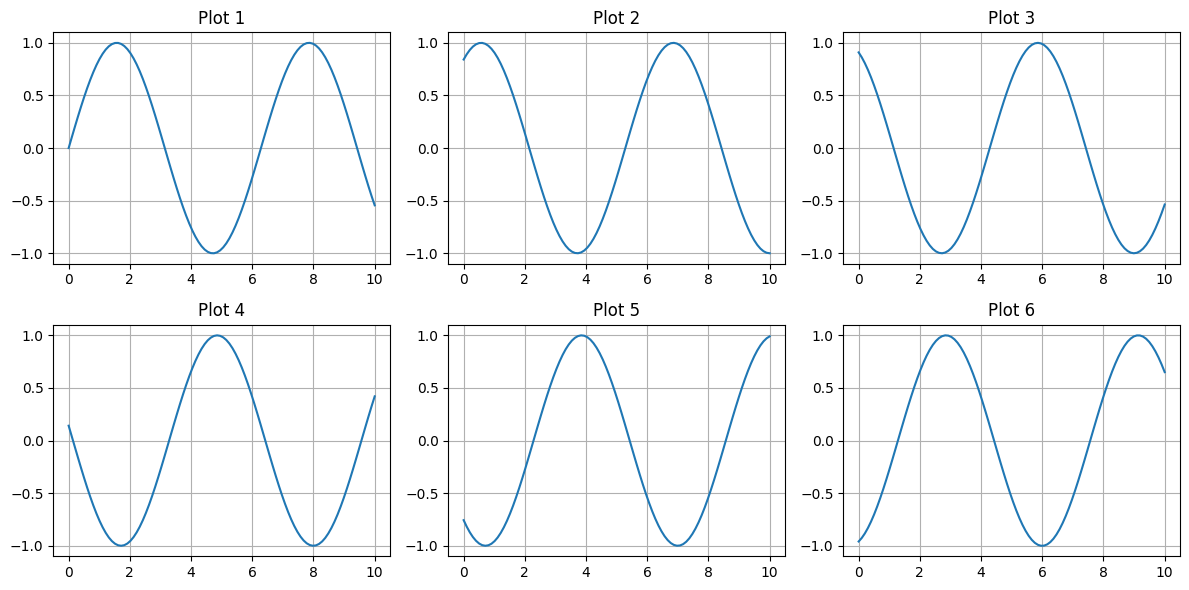

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(12,6))  # 2 lignes, 3 colonnes
axes = axes.flatten()  # Facilite l'accès via axes[0], axes[1], ...

for i, ax in enumerate(axes):
    ax.plot(x, np.sin(x+i))
    ax.set_title(f"Plot {i+1}")
    ax.grid(True)

plt.tight_layout()
plt.show()


## Échelles, ticks et axes personnalisés

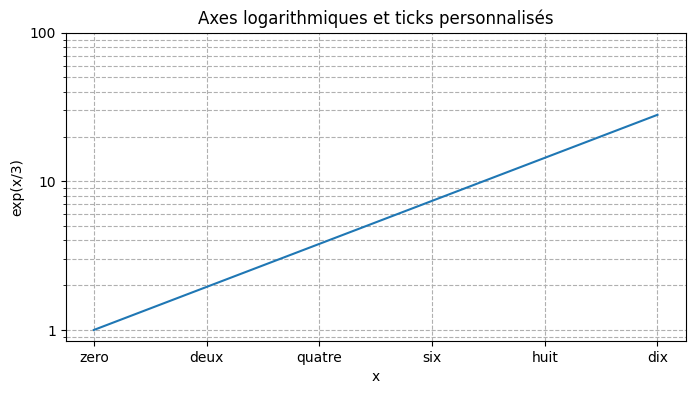

In [8]:
plt.figure(figsize=(8,4))
plt.plot(x, np.exp(x/3))
plt.title("Axes logarithmiques et ticks personnalisés")
plt.xlabel("x")
plt.ylabel("exp(x/3)")

plt.yscale("log")  # Échelle logarithmique
plt.xticks([0,2,4,6,8,10], ['zero','deux','quatre','six','huit','dix'])
plt.yticks([1,10,100], ['1','10','100'])
plt.grid(True, which="both", ls="--")
plt.show()


## Texte et annotations

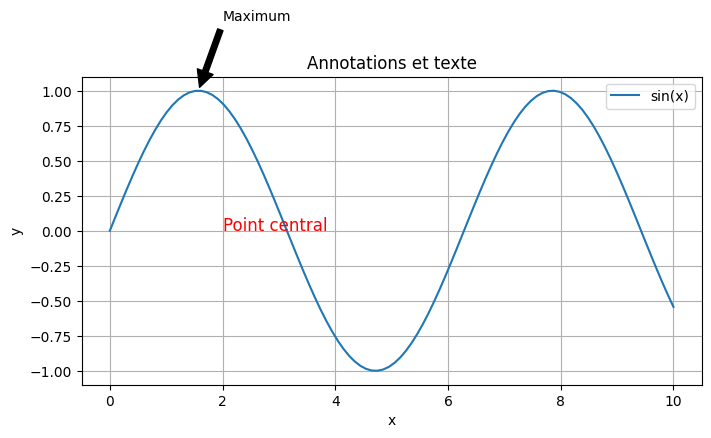

In [9]:
plt.figure(figsize=(8,4))
plt.plot(x, y, label='sin(x)')

plt.title("Annotations et texte")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

# Ajouter un texte
plt.text(2, 0, "Point central", fontsize=12, color='red')

# Annotation avec flèche
plt.annotate('Maximum', xy=(np.pi/2,1), xytext=(2,1.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend()
plt.show()


## Styles et thèmes

Solarize_Light2
_classic_test_patch
_mpl-gallery
_mpl-gallery-nogrid
bmh


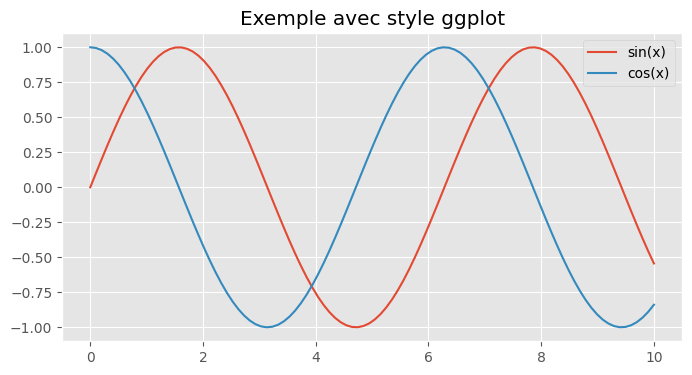

In [10]:
for style in plt.style.available[:5]:  # Affiche seulement les 5 premiers styles
    print(style)

plt.style.use('ggplot')  # Exemple de style
plt.figure(figsize=(8,4))
plt.plot(x, y, label='sin(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.title("Exemple avec style ggplot")
plt.legend()
plt.show()


## Animation simple

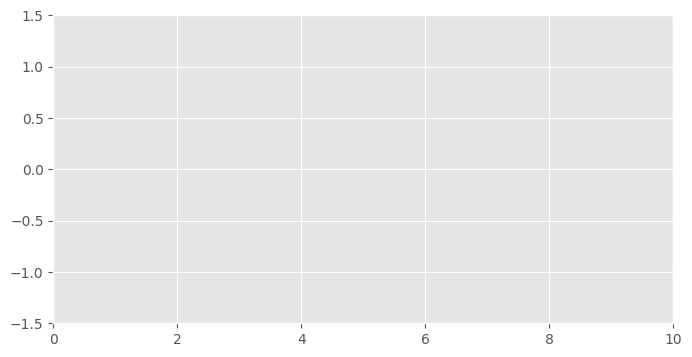

In [11]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(8,4))
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, 10)
ax.set_ylim(-1.5, 1.5)
ax.grid(True)

def init():
    line.set_data([], [])
    return line,

def update(frame):
    line.set_data(x[:frame], np.sin(x[:frame]))
    return line,

ani = FuncAnimation(fig, update, frames=len(x), init_func=init, blit=True, interval=50)
plt.show()


## Sauvegarde de figures

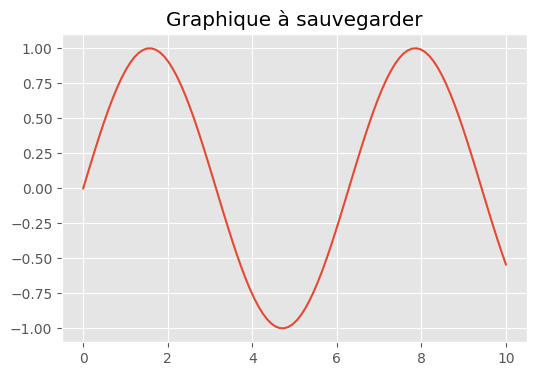

In [12]:
plt.figure(figsize=(6,4))
plt.plot(x, y)
plt.title("Graphique à sauvegarder")
plt.savefig("graphique_sin.png", dpi=300)  # PNG haute résolution
plt.savefig("graphique_sin.pdf")          # PDF vectoriel
plt.show()


## Multiple axes et axes secondaires

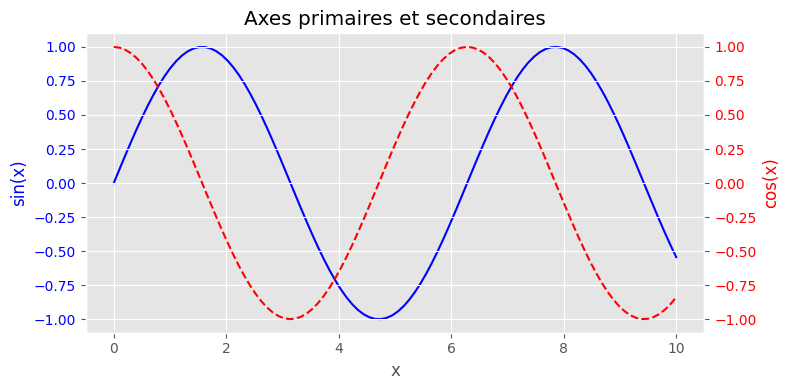

In [13]:
fig, ax1 = plt.subplots(figsize=(8,4))

ax1.plot(x, y, 'b-', label='sin(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('sin(x)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Création d'un axe y secondaire
ax2 = ax1.twinx()
ax2.plot(x, np.cos(x), 'r--', label='cos(x)')
ax2.set_ylabel('cos(x)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("Axes primaires et secondaires")
fig.tight_layout()
plt.show()


## Gridspec et disposition avancée

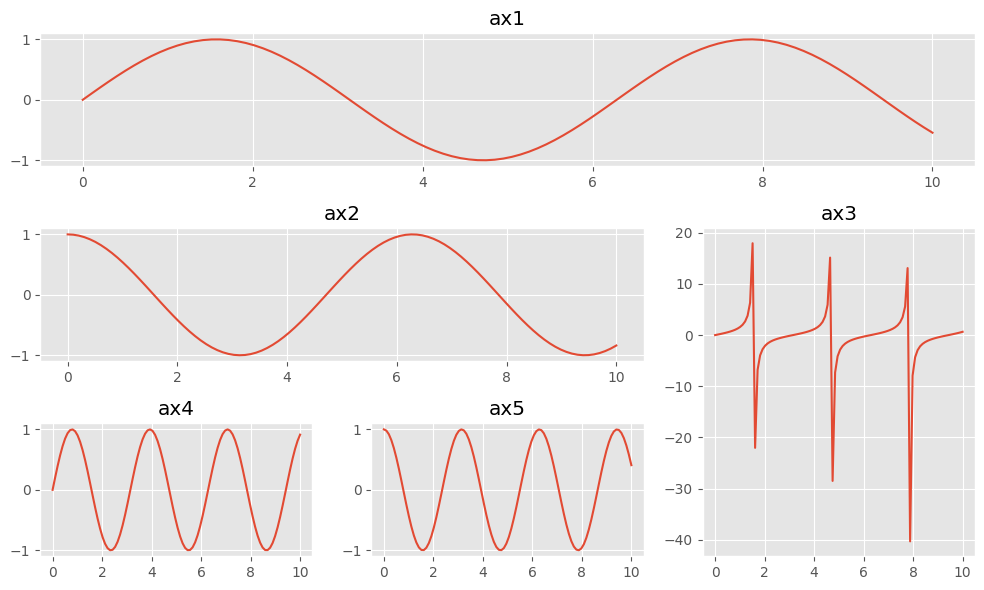

In [14]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(3, 3)

ax1 = fig.add_subplot(gs[0, :])  # Ligne complète
ax2 = fig.add_subplot(gs[1, :-1])
ax3 = fig.add_subplot(gs[1:, -1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])

ax1.plot(x, y)
ax1.set_title("ax1")
ax2.plot(x, np.cos(x))
ax2.set_title("ax2")
ax3.plot(x, np.tan(x))
ax3.set_title("ax3")
ax4.plot(x, np.sin(x*2))
ax4.set_title("ax4")
ax5.plot(x, np.cos(x*2))
ax5.set_title("ax5")

plt.tight_layout()
plt.show()


## Figures imbriquées (inset axes)

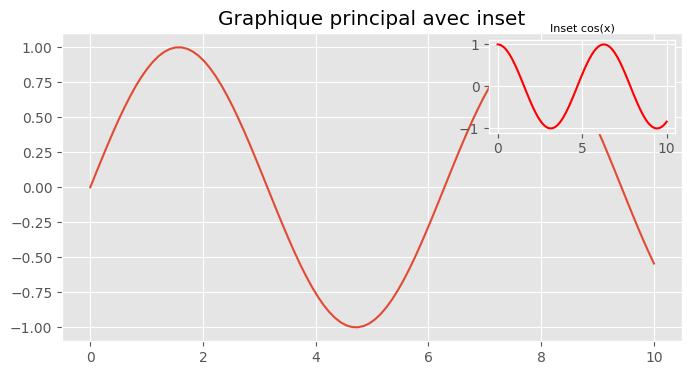

In [15]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, y, label='sin(x)')
ax.set_title("Graphique principal avec inset")
ax.grid(True)

# Création d'un inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

ax_inset = inset_axes(ax, width="30%", height="30%", loc='upper right')
ax_inset.plot(x, np.cos(x), 'r')
ax_inset.set_title("Inset cos(x)", fontsize=8)
ax_inset.grid(True)

plt.show()


## Travailler avec des images (imshow, imread, RGB, colormaps)

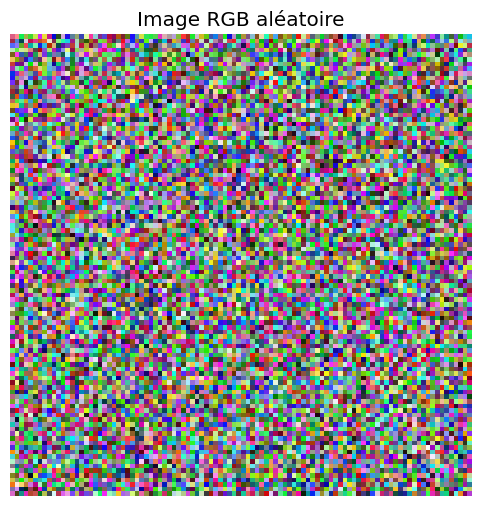

In [16]:
import matplotlib.image as mpimg

# Exemple avec imshow
img = np.random.rand(100,100,3)  # Image RGB aléatoire
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.title("Image RGB aléatoire")
plt.axis('off')  # Supprime les axes
plt.show()

# Lecture d'une image depuis un fichier (à adapter)
# image = mpimg.imread("votre_image.png")
# plt.imshow(image)
# plt.show()


## Interaction simple avec matplotlib (zoom, pan, sliders)

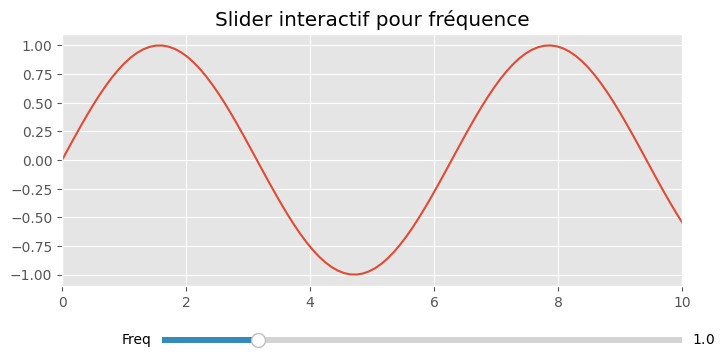

In [17]:
from matplotlib.widgets import Slider

fig, ax = plt.subplots(figsize=(8,4))
plt.subplots_adjust(bottom=0.25)

l, = plt.plot(x, y)
ax.set_title("Slider interactif pour fréquence")
ax.margins(x=0)

# Axes du slider
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03])
slider = Slider(axfreq, 'Freq', 0.1, 5.0, valinit=1)

def update(val):
    freq = slider.val
    l.set_ydata(np.sin(freq*x))
    fig.canvas.draw_idle()

slider.on_changed(update)
plt.show()


## Remplissage et zones colorées (fill_between)

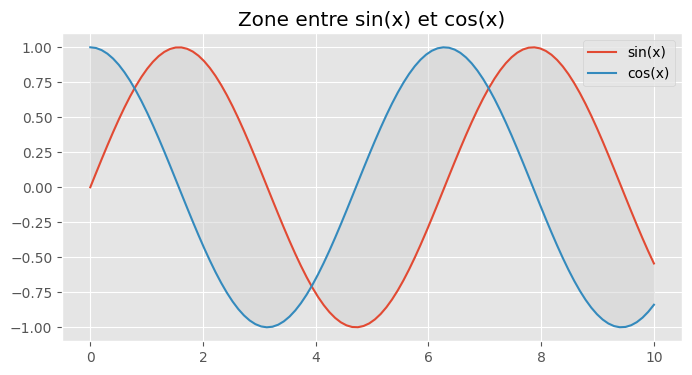

In [18]:
plt.figure(figsize=(8,4))
plt.plot(x, y, label='sin(x)')
plt.plot(x, y2, label='cos(x)')
plt.fill_between(x, y, y2, color='lightgray', alpha=0.5)
plt.title("Zone entre sin(x) et cos(x)")
plt.legend()
plt.grid(True)
plt.show()


## Transparence, alpha et superposition

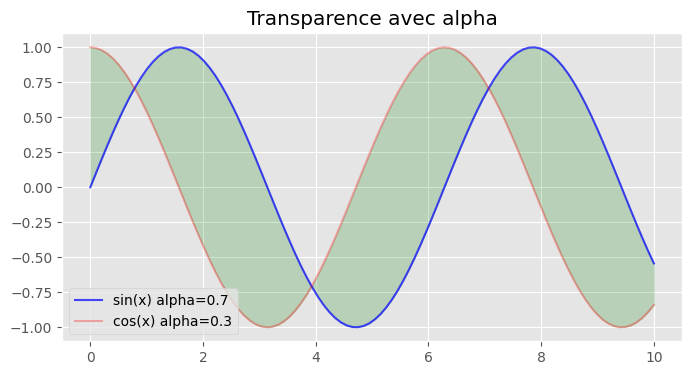

In [19]:
plt.figure(figsize=(8,4))
plt.plot(x, np.sin(x), 'b', alpha=0.7, label='sin(x) alpha=0.7')
plt.plot(x, np.cos(x), 'r', alpha=0.3, label='cos(x) alpha=0.3')
plt.fill_between(x, np.sin(x), np.cos(x), color='green', alpha=0.2)
plt.title("Transparence avec alpha")
plt.legend()
plt.show()

## Courbes paramétriques et polaires

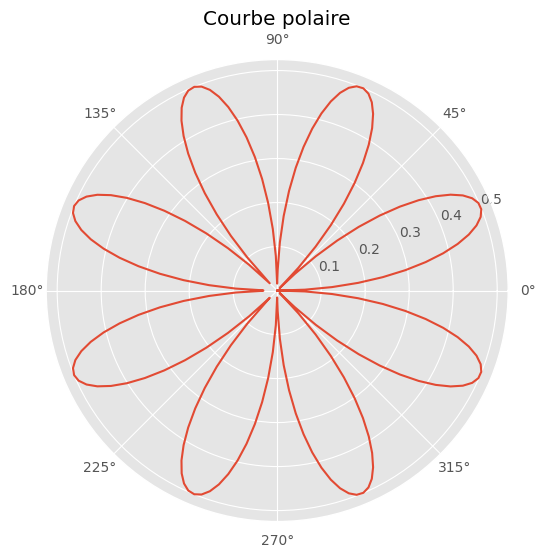

In [20]:
theta = np.linspace(0, 2*np.pi, 200)
r = np.abs(np.sin(2*theta)*np.cos(2*theta))

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.plot(theta, r)
ax.set_title("Courbe polaire")
plt.show()

## Markers avancés et styles de lignes

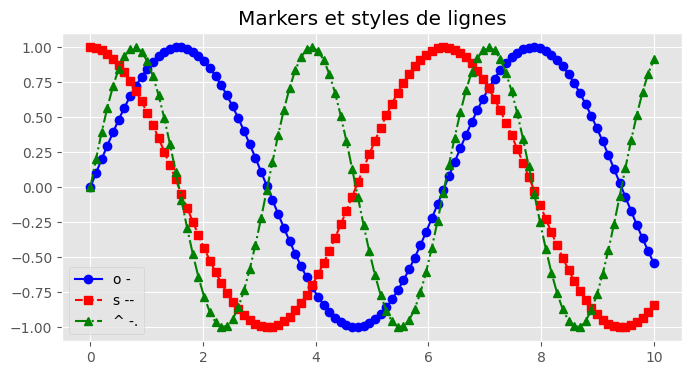

In [21]:
plt.figure(figsize=(8,4))
plt.plot(x, y, marker='o', linestyle='-', color='b', label='o -')
plt.plot(x, y2, marker='s', linestyle='--', color='r', label='s --')
plt.plot(x, np.sin(2*x), marker='^', linestyle='-.', color='g', label='^ -.')
plt.title("Markers et styles de lignes")
plt.legend()
plt.grid(True)
plt.show()

## Histogrammes multiples et empilés

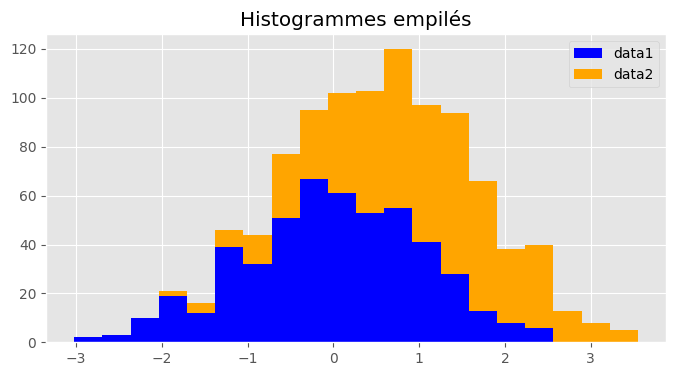

In [22]:
data1 = np.random.randn(500)
data2 = np.random.randn(500) + 1

plt.figure(figsize=(8,4))
plt.hist([data1, data2], bins=20, stacked=True, color=['blue','orange'], label=['data1','data2'])
plt.title("Histogrammes empilés")
plt.legend()
plt.show()

## Courbes de tendance et régression linéaire simple

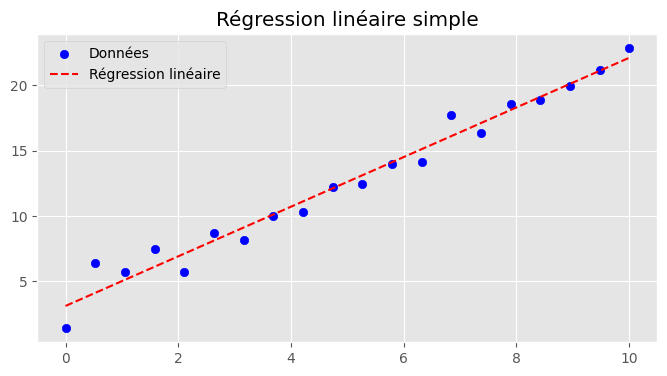

In [23]:
from numpy.polynomial.polynomial import Polynomial

x_data = np.linspace(0,10,20)
y_data = 2*x_data + 3 + np.random.randn(20)

plt.figure(figsize=(8,4))
plt.scatter(x_data, y_data, color='blue', label='Données')

# Ajustement linéaire
p = Polynomial.fit(x_data, y_data, 1)
y_fit = p(x_data)
plt.plot(x_data, y_fit, 'r--', label='Régression linéaire')

plt.title("Régression linéaire simple")
plt.legend()
plt.grid(True)
plt.show()

## Heatmaps avec imshow et pcolormesh

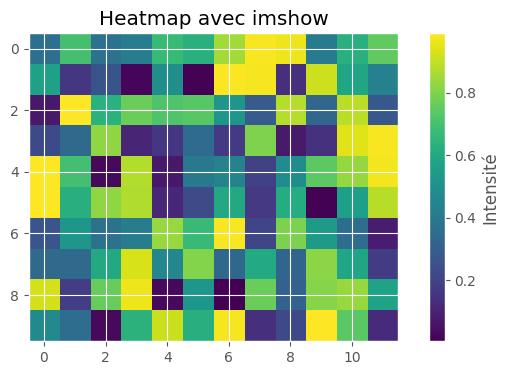

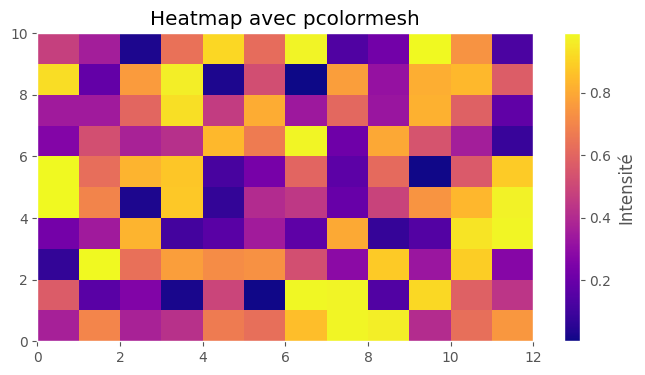

In [24]:
Z = np.random.rand(10,12)

plt.figure(figsize=(8,4))
plt.imshow(Z, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Intensité')
plt.title("Heatmap avec imshow")
plt.show()

# pcolormesh (plus flexible pour coordonnées)
x = np.arange(0,13)
y = np.arange(0,11)
X, Y = np.meshgrid(x, y)
plt.figure(figsize=(8,4))
plt.pcolormesh(X, Y, Z, cmap='plasma', shading='auto')
plt.colorbar(label='Intensité')
plt.title("Heatmap avec pcolormesh")
plt.show()

## Courbes paramétriques complexes

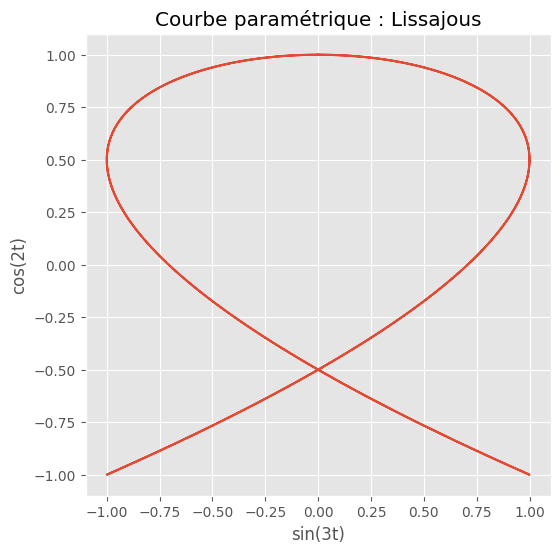

In [25]:
t = np.linspace(0, 2*np.pi, 400)
x = np.sin(3*t)
y = np.cos(2*t)

plt.figure(figsize=(6,6))
plt.plot(x, y)
plt.title("Courbe paramétrique : Lissajous")
plt.xlabel("sin(3t)")
plt.ylabel("cos(2t)")
plt.grid(True)
plt.show()

## Courbes avec barres d’erreur

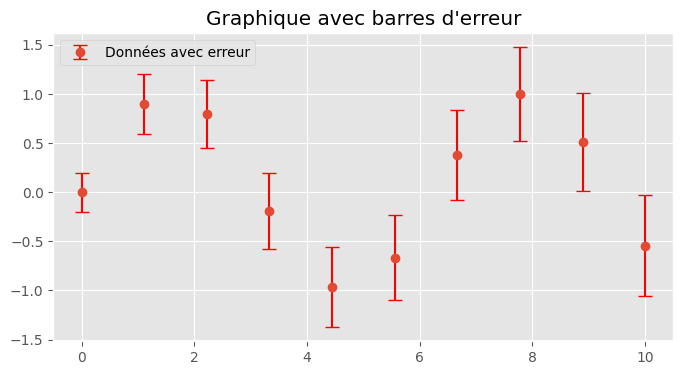

In [26]:
x = np.linspace(0, 10, 10)
y = np.sin(x)
yerr = 0.2 + 0.1*np.sqrt(x)

plt.figure(figsize=(8,4))
plt.errorbar(x, y, yerr=yerr, fmt='o', ecolor='red', capsize=5, label='Données avec erreur')
plt.title("Graphique avec barres d'erreur")
plt.legend()
plt.grid(True)
plt.show()

## Remplissage entre plusieurs courbes (fill_betweenx)

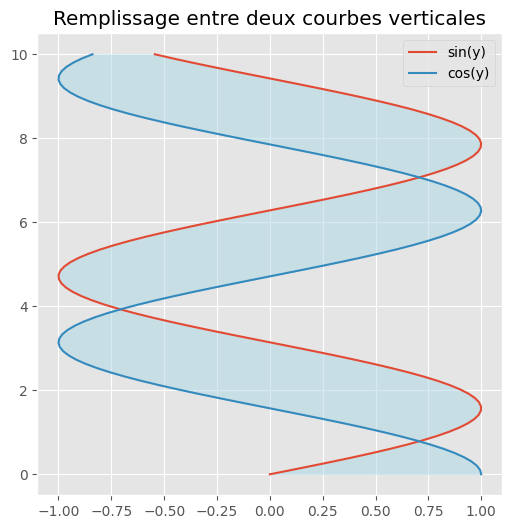

In [27]:
y = np.linspace(0, 10, 100)
x1 = np.sin(y)
x2 = np.cos(y)

plt.figure(figsize=(6,6))
plt.plot(x1, y, label='sin(y)')
plt.plot(x2, y, label='cos(y)')
plt.fill_betweenx(y, x1, x2, color='lightblue', alpha=0.5)
plt.title("Remplissage entre deux courbes verticales")
plt.legend()
plt.grid(True)
plt.show()

## Annotations avancées avec bbox et flèches

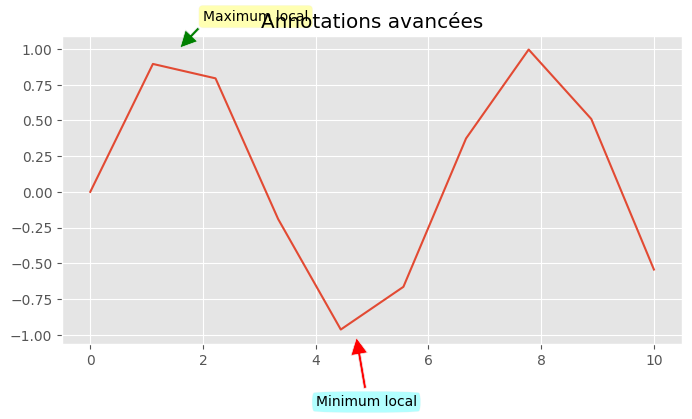

In [28]:
plt.figure(figsize=(8,4))
plt.plot(x, np.sin(x), label='sin(x)')
plt.title("Annotations avancées")
plt.grid(True)

plt.annotate('Maximum local', xy=(np.pi/2,1), xytext=(2,1.2),
             arrowprops=dict(facecolor='green', shrink=0.05, width=2),
             bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))

plt.annotate('Minimum local', xy=(3*np.pi/2,-1), xytext=(4,-1.5),
             arrowprops=dict(facecolor='red', shrink=0.05, width=2),
             bbox=dict(boxstyle="round4,pad=0.3", fc="cyan", alpha=0.3))
plt.show()

## Couleurs et colormaps avancées

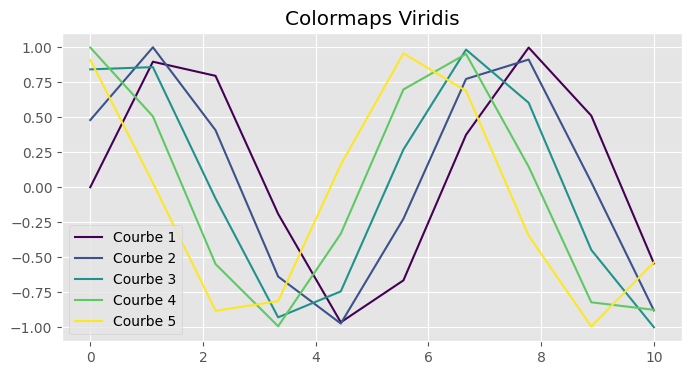

In [29]:
plt.figure(figsize=(8,4))
for i, c in enumerate(plt.cm.viridis(np.linspace(0,1,5))):
    plt.plot(x, np.sin(x+i/2), color=c, label=f'Courbe {i+1}')

plt.title("Colormaps Viridis")
plt.legend()
plt.grid(True)
plt.show()

## Graphiques combinés (scatter + lignes + barres)

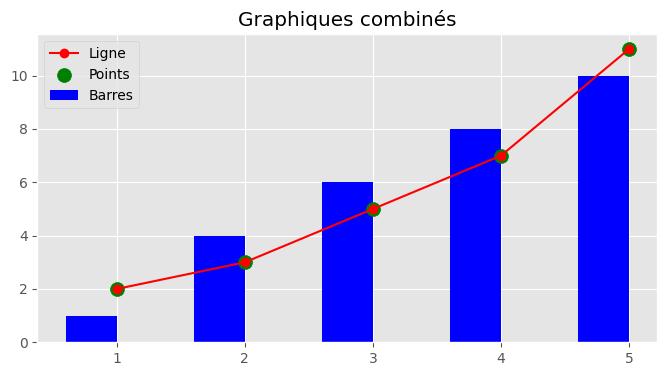

In [30]:
x = np.arange(1,6)
y_line = np.array([2,3,5,7,11])
y_bar = np.array([1,4,6,8,10])

plt.figure(figsize=(8,4))
plt.plot(x, y_line, 'r-o', label='Ligne')
plt.bar(x-0.2, y_bar, width=0.4, color='blue', label='Barres')
plt.scatter(x, y_line, color='green', s=100, label='Points')
plt.title("Graphiques combinés")
plt.legend()
plt.grid(True)
plt.show()

## Graphiques 3D complexes (surface + ligne + scatter)

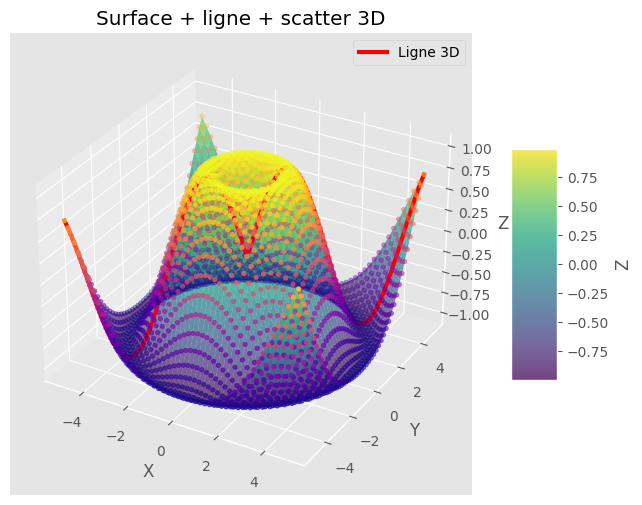

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Données
X = np.linspace(-5,5,50)
Y = np.linspace(-5,5,50)
X, Y = np.meshgrid(X,Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
fig.colorbar(surf, shrink=0.5, aspect=5, label='Z')

# Ligne 3D
t = np.linspace(-5,5,100)
ax.plot(t, t, np.sin(np.sqrt(t**2+t**2)), 'r', lw=3, label='Ligne 3D')

# Points 3D
ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=Z.flatten(), cmap='plasma', s=10)

ax.set_title("Surface + ligne + scatter 3D")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()

## Histogrammes 3D

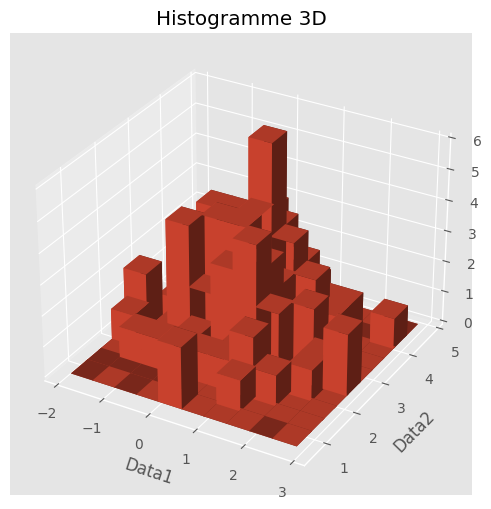

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

data1 = np.random.normal(0,1,100)
data2 = np.random.normal(3,1,100)

hist, edges = np.histogramdd((data1, data2), bins=(10,10))

# Tracé
xpos, ypos = np.meshgrid(edges[0][:-1]+0.25, edges[1][:-1]+0.25, indexing="ij")
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)
dx = dy = 0.5
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True)
ax.set_title("Histogramme 3D")
ax.set_xlabel("Data1")
ax.set_ylabel("Data2")
ax.set_zlabel("Counts")
plt.show()

## Animation 3D simple

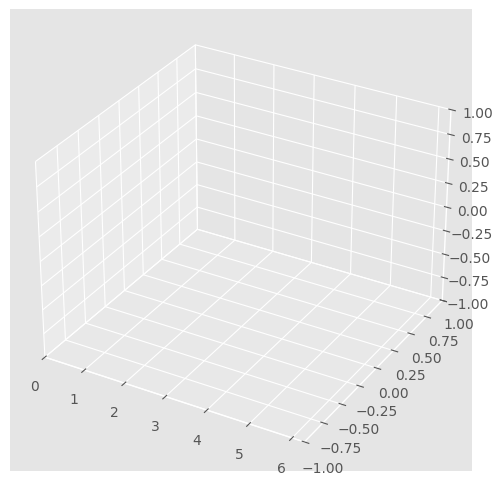

In [33]:
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

t = np.linspace(0, 2*np.pi, 100)
line, = ax.plot([], [], [], 'b', lw=2)

def init():
    line.set_data([], [])
    line.set_3d_properties([])
    return line,

def update(frame):
    line.set_data(t[:frame], np.sin(t[:frame]))
    line.set_3d_properties(np.cos(t[:frame]))
    return line,

ani = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, interval=50)
plt.show()

## Subplots imbriqués complexes

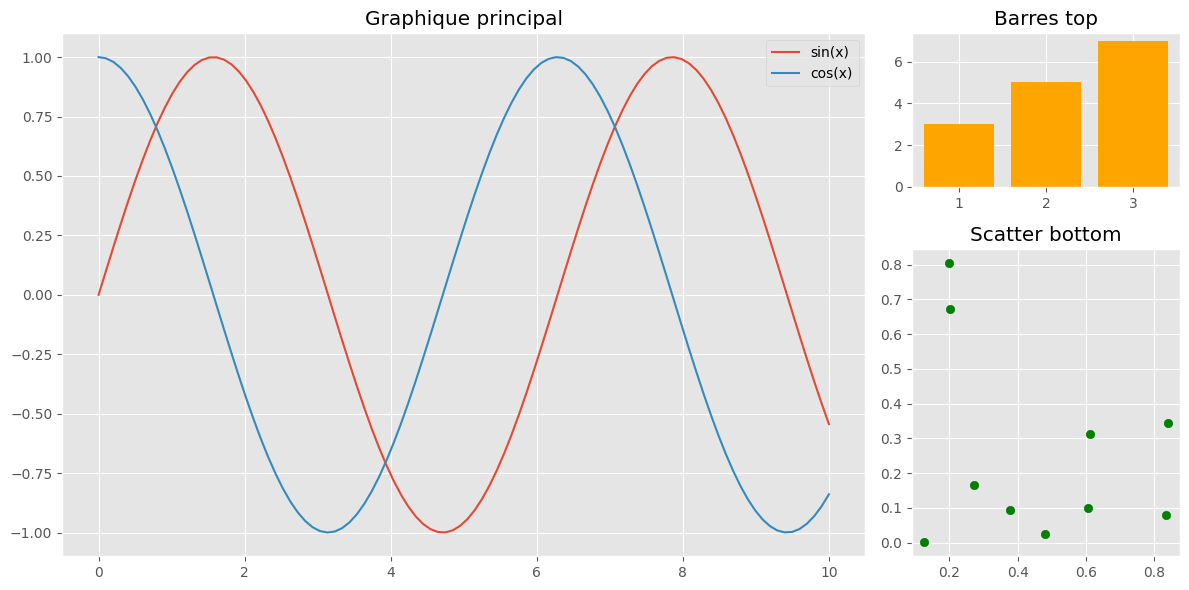

In [34]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(2,2, width_ratios=[3,1], height_ratios=[1,2])

ax_main = fig.add_subplot(gs[:,0])  # Graphique principal
ax_top = fig.add_subplot(gs[0,1])  # Graphique top droit
ax_bottom = fig.add_subplot(gs[1,1])  # Graphique bottom droit

x = np.linspace(0,10,100)
ax_main.plot(x, np.sin(x), label='sin(x)')
ax_main.plot(x, np.cos(x), label='cos(x)')
ax_main.set_title("Graphique principal")
ax_main.legend()
ax_main.grid(True)

ax_top.bar([1,2,3], [3,5,7], color='orange')
ax_top.set_title("Barres top")

ax_bottom.scatter(np.random.rand(10), np.random.rand(10), color='green')
ax_bottom.set_title("Scatter bottom")

plt.tight_layout()
plt.show()


## Export avancé (PDF, SVG, DPI élevé)

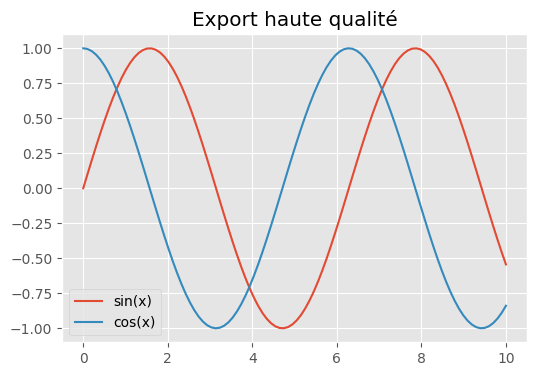

In [35]:
plt.figure(figsize=(6,4))
plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.title("Export haute qualité")
plt.legend()
plt.grid(True)

# Export PNG haute résolution
plt.savefig("graphique_HD.png", dpi=600)

# Export PDF vectoriel
plt.savefig("graphique_vectoriel.pdf")

# Export SVG
plt.savefig("graphique_vectoriel.svg")
plt.show()

## Cheat Sheet complet Matplotlib

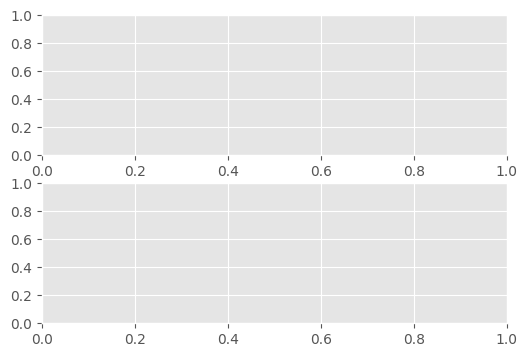

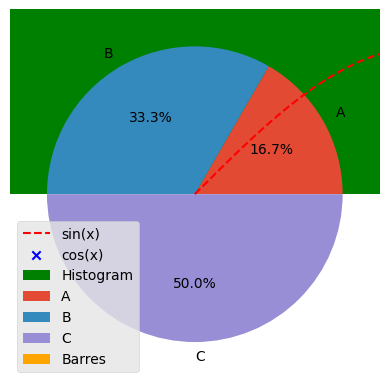

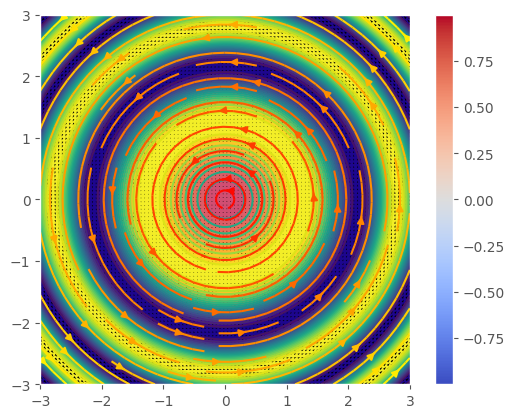

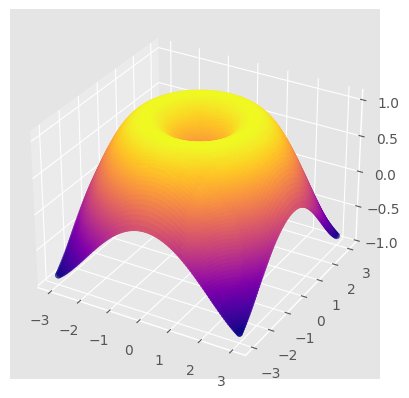

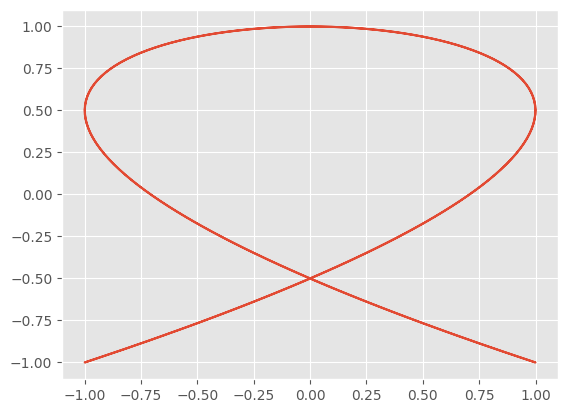

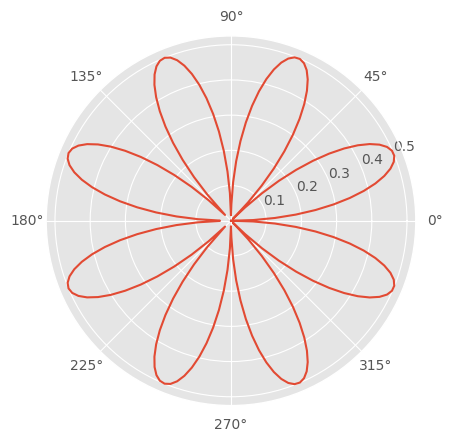

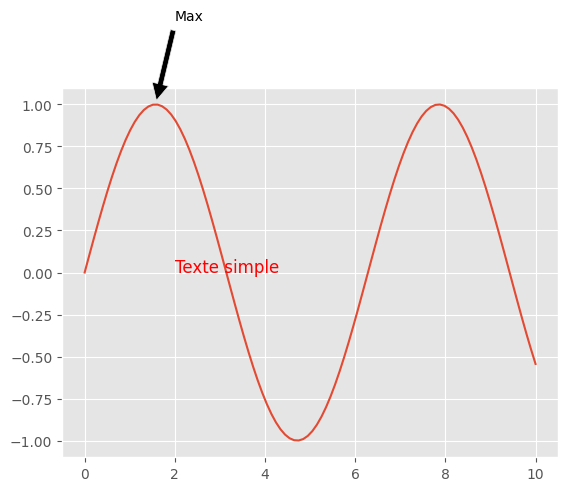

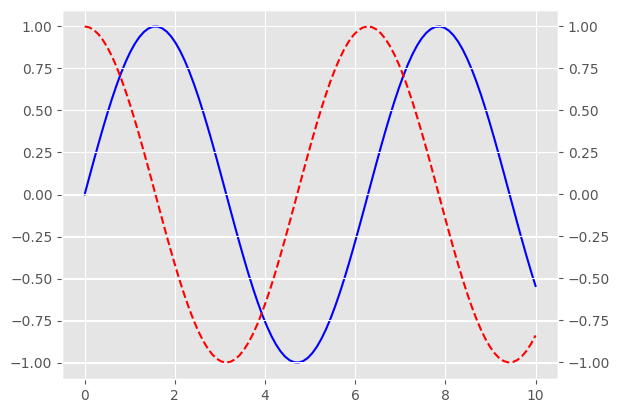

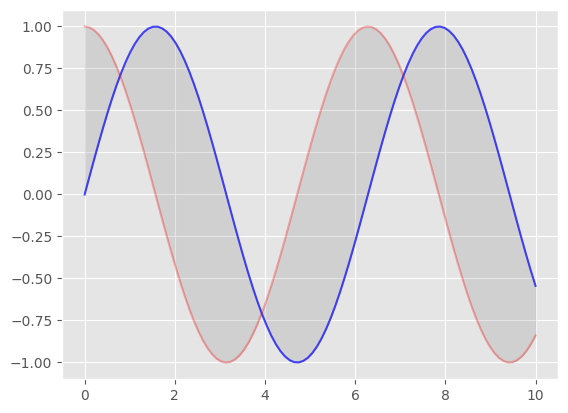

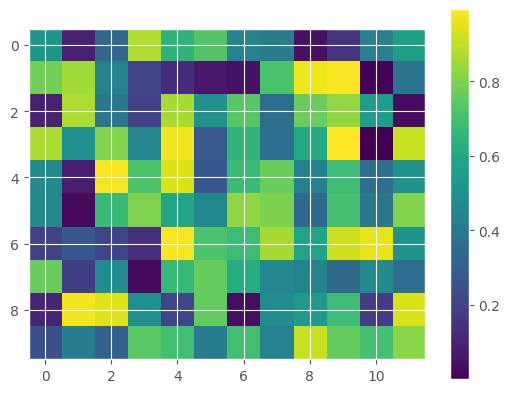

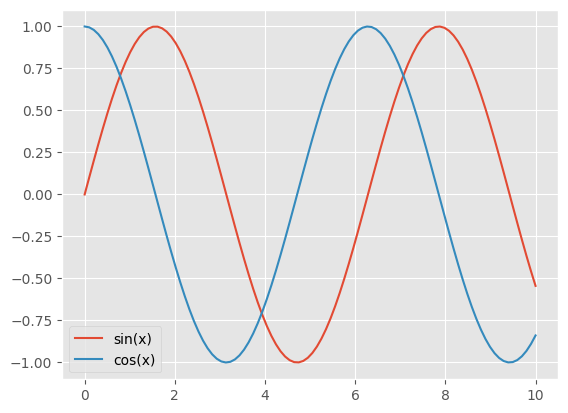

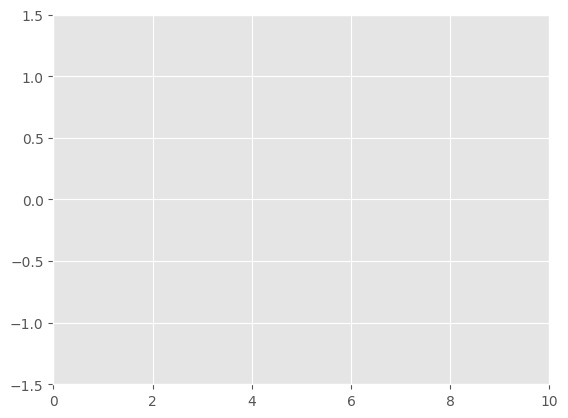

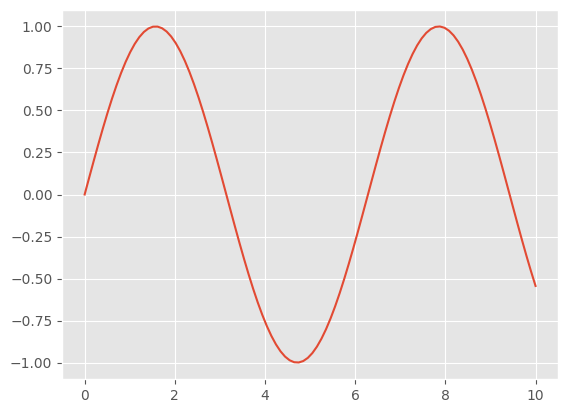

In [36]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)
y2 = np.cos(x)

# ==============================
# 1. Figures et axes
# ==============================
plt.figure(figsize=(6,4))   # Taille figure
plt.subplot(2,1,1)          # Subplot 1
plt.subplot(2,1,2)          # Subplot 2
plt.show()

# ==============================
# 2. Graphiques 2D
# ==============================
plt.plot(x, y, 'r--', label='sin(x)')  # Ligne avec style
plt.scatter(x, y2, c='b', marker='x', label='cos(x)')  # Scatter
plt.bar([1,2,3], [5,3,6], color='orange', label='Barres')
plt.hist(np.random.randn(1000), bins=20, color='green', label='Histogram')
plt.pie([10,20,30], labels=['A','B','C'], autopct='%1.1f%%')
plt.legend()
plt.grid(True)
plt.show()

# ==============================
# 3. Graphiques avancés
# ==============================
X, Y = np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))
Z = np.sin(X**2 + Y**2)
plt.contour(X,Y,Z, levels=20, cmap='viridis')   # Contour
plt.contourf(X,Y,Z, levels=20, cmap='plasma')  # Contour rempli
plt.imshow(Z, extent=[-3,3,-3,3], origin='lower', cmap='coolwarm')  # Image
plt.colorbar()
plt.quiver(X,Y,-Y,X)                            # Vecteurs
plt.streamplot(X,Y,-Y,X, color=np.sqrt(X**2+Y**2), cmap='autumn')  # Flux
plt.show()

# ==============================
# 4. Graphiques 3D
# ==============================
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Z3 = np.sin(np.sqrt(X**2+Y**2))
ax.plot_surface(X,Y,Z3, cmap='viridis', alpha=0.7)
ax.scatter(X.flatten(), Y.flatten(), Z3.flatten(), c=Z3.flatten(), cmap='plasma')
plt.show()

# ==============================
# 5. Courbes paramétriques & polaires
# ==============================
t = np.linspace(0, 2*np.pi, 200)
plt.plot(np.sin(3*t), np.cos(2*t))  # Lissajous
plt.figure()
ax = plt.subplot(111, polar=True)
ax.plot(t, np.abs(np.sin(2*t)*np.cos(2*t)))  # Polaire
plt.show()

# ==============================
# 6. Annotations et texte
# ==============================
plt.plot(x, y)
plt.text(2,0,"Texte simple", fontsize=12, color='red')
plt.annotate('Max', xy=(np.pi/2,1), xytext=(2,1.5),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

# ==============================
# 7. Axes multiples et secondaires
# ==============================
fig, ax1 = plt.subplots()
ax1.plot(x, y, 'b', label='sin(x)')
ax2 = ax1.twinx()
ax2.plot(x, y2, 'r--', label='cos(x)')
plt.show()

# ==============================
# 8. Fill, alpha, transparence
# ==============================
plt.plot(x, y, 'b', alpha=0.7)
plt.plot(x, y2, 'r', alpha=0.3)
plt.fill_between(x, y, y2, color='gray', alpha=0.2)
plt.show()

# ==============================
# 9. Heatmaps
# ==============================
Z_heat = np.random.rand(10,12)
plt.imshow(Z_heat, cmap='viridis')
plt.colorbar()
plt.show()

# ==============================
# 10. Styles et colormaps
# ==============================
plt.style.use('ggplot')
plt.plot(x, y, label='sin(x)')
plt.plot(x, y2, label='cos(x)')
plt.legend()
plt.show()

# ==============================
# 11. Animation (2D)
# ==============================
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()
line, = ax.plot([], [])
ax.set_xlim(0,10)
ax.set_ylim(-1.5,1.5)
def init(): line.set_data([],[]); return line,
def update(frame): line.set_data(x[:frame], y[:frame]); return line,
ani = FuncAnimation(fig, update, frames=len(x), init_func=init, blit=True, interval=50)
plt.show()

# ==============================
# 12. Sauvegarde & export
# ==============================
plt.plot(x,y)
plt.savefig("graph_HD.png", dpi=600)
plt.savefig("graph_vectoriel.pdf")
plt.savefig("graph_vectoriel.svg")
plt.show()
